In [1]:
!export MPLCONFIGDIR=/mnt/beegfs/lcesarini/tmp/mat

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'
import sys
sys.path.append("/mnt/beegfs/lcesarini/2022_resilience/")
# sys.path.append("/mnt/beegfs/lcesarini/2022_resilience/resilience/SBCK-python/")
import argparse
import rioxarray
import subprocess
import numpy as np 
import xarray as xr 
import pandas as pd
from glob import glob
from tqdm import tqdm
import geopandas as gpd
import matplotlib as mpl
from random import sample
# import xarray.ufuncs as xu 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
from shapely.geometry import mapping
from cartopy import feature as cfeature
from math import pi,sin,cos, asin, atan2
from sklearn.metrics import (mean_absolute_error,mean_squared_error,
                             r2_score,mean_absolute_percentage_error)

import warnings
warnings.filterwarnings('ignore')

from resilience.utils import *

os.chdir("/mnt/beegfs/lcesarini/2022_resilience/")

PATH_COMMON_DATA="/mnt/beegfs/lcesarini/DATA_FPS"
PATH_BIAS_CORRECTED = f"/mnt/beegfs/lcesarini/BIAS_CORRECTED/" 
PATH_COSMO=f"/mnt/data/lcesarini/COSMO/REA_2"




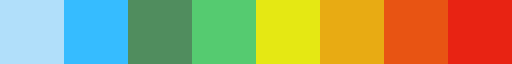

In [20]:
p1,p2,p3=get_palettes()
l1,l2,l3=get_levels()
p3

In [32]:
x=xr.open_mfdataset(glob("/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199*.nc")).load()

In [40]:
def get_wethours(ds):
    if hasattr(ds,"tp"):
        _x=xr.where(ds.tp > 0.1, ds.tp, np.nan)
    elif hasattr(ds,"pr"):
        _x=xr.where(ds.pr > 0.1, ds.pr, np.nan)
    else:
        _x=xr.where(ds > 0.1, ds, np.nan)
    return _x

x_wh_djf=get_wethours(get_season(x,season='DJF'))
x_wh_mam=get_wethours(get_season(x,season='MAM'))
x_wh_jja=get_wethours(get_season(x,season='JJA'))
x_wh_son=get_wethours(get_season(x,season='SON'))

In [43]:
l3=np.arange(2,27,3)
l3

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26])

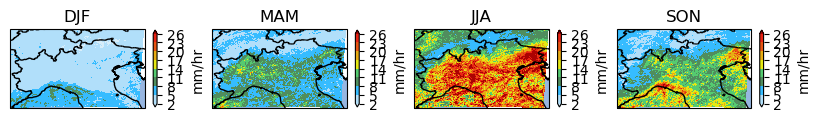

In [53]:
SHRINK_CBAR=0.05
fig,ax=plt.subplots(1,4,figsize=(10,20),subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
x_wh_djf.quantile(q=0.99,dim='time').plot(
    cmap=p3,levels=l3,add_colorbar=True,
    extend='both',
    ax=ax[0],cbar_kwargs={'label':'mm/hr','shrink':SHRINK_CBAR,'orientation':'vertical'}
    )
x_wh_mam.quantile(q=0.99,dim='time').plot(
    cmap=p3,levels=l3,add_colorbar=True,
    extend='both',
    ax=ax[1],cbar_kwargs={'label':'mm/hr','shrink':SHRINK_CBAR,'orientation':'vertical'}
    )
x_wh_jja.quantile(q=0.99,dim='time').plot(
    cmap=p3,levels=l3,add_colorbar=True,
    extend='both',
    ax=ax[2],cbar_kwargs={'label':'mm/hr','shrink':SHRINK_CBAR,'orientation':'vertical'}
    )
x_wh_son.quantile(q=0.99,dim='time').plot(
    cmap=p3,levels=l3,add_colorbar=True,
    extend='both',
    ax=ax[3],cbar_kwargs={'label':'mm/hr','shrink':SHRINK_CBAR,'orientation':'vertical'}
    )
[ax[_].coastlines() for _ in range(4)]
[ax[_].add_feature(cfeature.BORDERS) for _ in range(4)]
# [ax[_].add_feature(cfeature.LAND) for _ in range(4)]
[ax[_].add_feature(cfeature.OCEAN) for _ in range(4)]

ax[0].set_title("DJF")
ax[1].set_title("MAM")
ax[2].set_title("JJA")
ax[3].set_title("SON")

plt.show()

In [78]:
matching_files=(glob("/mnt/beegfs/lcesarini/SPHERA/original/pr/199*tpH_remapped.grb2"))
matching_files
# ll_files=np.array(matching_files)[[('idx' not in xx) for xx in matching_files]]
# len(ll_files)

['/mnt/beegfs/lcesarini/SPHERA/original/pr/199910_ten1_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199808_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199901_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199802_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199511_ten2_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199502_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199707_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199612_ten3_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199604_ten2_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199707_ten1_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199908_ten1_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHERA/original/pr/199510_ten2_Tdeep_tpH_remapped.grb2',
 '/mnt/beegfs/lcesarini/SPHE

In [79]:
(glob("/mnt/beegfs/lcesarini/SPHERA/decumulated/new/*199*"))



['/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199608.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199703.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199805.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199501.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199702.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199704.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199503.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199905.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199604.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199512.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199601.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199705.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199611.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199907.nc',
 '/mnt/beegfs/lcesarini/SPHERA/decumulated/new/SPHERA_199901.nc',
 '/mnt/bee

In [68]:
for MDL in os.listdir("/mnt/beegfs/lcesarini/DATA_FPS/Historical"):
    ll_files=glob(f"/mnt/beegfs/lcesarini/DATA_FPS/Historical/{MDL}/CPM/pr/*.nc")
    years=[]
    if (len(ll_files)==0) or (MDL=="FZJ-IBG3-WRF381CA") or (MDL=="FZJ-IDL-WRF381DA"):
        continue    
    else:
        for file in ll_files:
            years.append(int(os.path.basename(file).split('_')[2][:4]))
        print(MDL,min(years),max(years))

MOHC 1998 2007
HCLIMcom 1996 2005
CNRM 1996 2005
KNMI 1996 2005
CMCC 1996 2005
KIT 1996 2005
ETH 1996 2005
ICTP 1995 2005


# SPHERA at 01

Let's try to find out what happens in SPHERA at 1

In [4]:
!ls /mnt/beegfs/lcesarini/DATA_FPS/reanalysis/SPHERA/pr/

200001_mid1_Tdeep_tpH_zoom.nc  200501_ten3_Tdeep_tpH_zoom.nc
200001_ten3_Tdeep_tpH_zoom.nc  200502_ten1_Tdeep_tpH_zoom.nc
200002_ten1_Tdeep_tpH_zoom.nc  200502_ten2_Tdeep_tpH_zoom.nc
200002_ten2_Tdeep_tpH_zoom.nc  200502_ten3_Tdeep_tpH_zoom.nc
200002_ten3_Tdeep_tpH_zoom.nc  200503_ten1_Tdeep_tpH_zoom.nc
200003_ten1_Tdeep_tpH_zoom.nc  200503_ten2_Tdeep_tpH_zoom.nc
200003_ten2_Tdeep_tpH_zoom.nc  200503_ten3_Tdeep_tpH_zoom.nc
200003_ten3_Tdeep_tpH_zoom.nc  200504_ten1_Tdeep_tpH_zoom.nc
200004_ten1_Tdeep_tpH_zoom.nc  200504_ten2_Tdeep_tpH_zoom.nc
200004_ten2_Tdeep_tpH_zoom.nc  200504_ten3_Tdeep_tpH_zoom.nc
200004_ten3_Tdeep_tpH_zoom.nc  200505_ten1_Tdeep_tpH_zoom.nc
200005_ten1_Tdeep_tpH_zoom.nc  200505_ten2_Tdeep_tpH_zoom.nc
200005_ten2_Tdeep_tpH_zoom.nc  200505_ten3_Tdeep_tpH_zoom.nc
200005_ten3_Tdeep_tpH_zoom.nc  200506_ten1_Tdeep_tpH_zoom.nc
200006_ten1_Tdeep_tpH_zoom.nc  200506_ten2_Tdeep_tpH_zoom.nc
200006_ten2_Tdeep_tpH_zoom.nc  200506_ten3_Tdeep_tpH_zoom.nc
200006_ten3_Tdeep_tpH_zo

In [5]:
ds_ori=xr.load_dataset("/mnt/beegfs/lcesarini/DATA_FPS/reanalysis/SPHERA/pr/200912_ten2_Tdeep_tpH_zoom.nc")
ds_ori

<xarray.Dataset>
Dimensions:    (time: 240, latitude: 158, longitude: 272)
Coordinates:
  * time       (time) datetime64[ns] 2009-12-11T01:00:00 ... 2009-12-21
    surface    float64 0.0
  * latitude   (latitude) float64 43.25 43.28 43.3 43.33 ... 47.51 47.54 47.57
  * longitude  (longitude) float64 6.5 6.527 6.555 6.582 ... 13.9 13.92 13.95
Data variables:
    pr         (time, latitude, longitude) float64 0.0 0.0 0.0 ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-03-08T13:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
ds_extr=ds_ori.groupby(ds_ori['time.hour']).quantile(q=0.999)
ds_extr

<xarray.Dataset>
Dimensions:    (latitude: 158, longitude: 272, hour: 24)
Coordinates:
  * latitude   (latitude) float64 43.25 43.28 43.3 43.33 ... 47.51 47.54 47.57
  * longitude  (longitude) float64 6.5 6.527 6.555 6.582 ... 13.9 13.92 13.95
    quantile   float64 0.999
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    pr         (hour, latitude, longitude) float64 0.5859 0.6633 ... nan nan

<xarray.Dataset>
Dimensions:   (hour: 24)
Coordinates:
    quantile  float64 0.999
  * hour      (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Data variables:
    pr        (hour) float64 0.6727 0.1699 0.4394 0.5976 ... 0.6619 0.716 0.6747

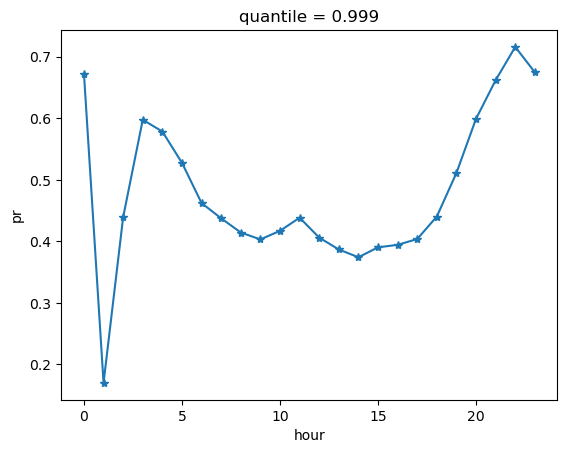

In [16]:
ds_extr.mean(dim=['longitude','latitude']).pr.plot(marker='*')

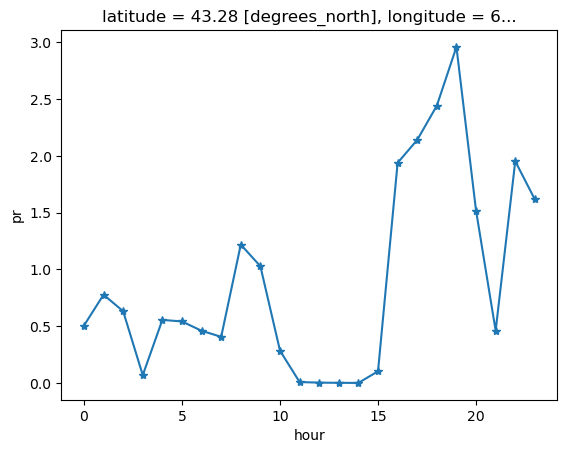

In [19]:
ds_extr.isel(longitude=1,latitude=1).pr.plot(marker='*')

In [3]:
x=xr.open_dataset(f"{PATH_BIAS_CORRECTED}EQM/CMCC/mw/CMCC_CORR_SPHERA_MAM_Q1000_SEQUENTIAL_VALIDATION_northern_italy.nc")
x

<xarray.Dataset>
Dimensions:  (time: 11040, lon: 272, lat: 158)
Coordinates:
  * time     (time) datetime64[ns] 2005-03-01 ... 2009-05-31T23:00:00
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Data variables:
    mw       (lat, lon, time) float32 ...

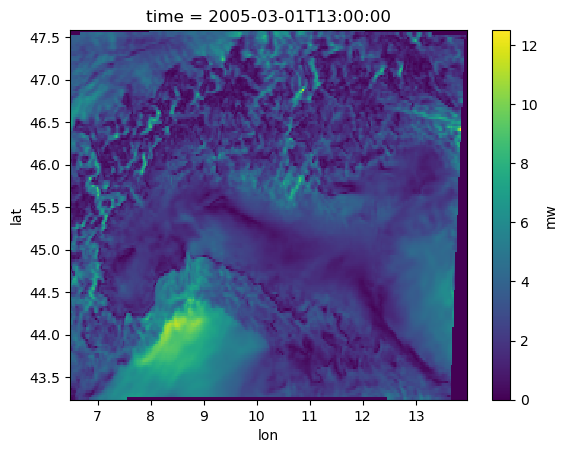

In [4]:
x.isel(time=13).mw.plot()

In [5]:
xr.open_dataset("/mnt/beegfs/lcesarini/DATA_FPS/ECMWF-ERAINT/KIT/CPM/mw/mw_KIT_ECMWF-ERAINT_200001010000-200012312300.nc")

OSError: [Errno -101] NetCDF: HDF error: '/mnt/beegfs/lcesarini/DATA_FPS/ECMWF-ERAINT/KIT/CPM/mw/mw_KIT_ECMWF-ERAINT_200001010000-200012312300.nc'

In [14]:
import pandas as pd

A = pd.DataFrame([[4, 8, 6], [-1, -2, -3], [-1, 3, 4]])
M = A.rolling(window=3, min_periods=1, center=True, axis=1).max()

print(M)
# Output:
#      0    1    2
# 0  4.0  4.0  6.0
# 1 -2.0 -3.0 -3.0
# 2 -1.0 -1.0  3.0

     0    1    2
0  8.0  8.0  8.0
1 -1.0 -1.0 -2.0
2  3.0  4.0  4.0


In [4]:
import pickle 
with open('knmi_len_events.pkl', 'rb') as file:
    len_per_above_threshold=pickle.load(file)

with open('knmi_max_events.pkl', 'rb') as file:
    max_per_periods=pickle.load(file)

with open('knmi_mean_events.pkl', 'rb') as file:
    mean_per_periods=pickle.load(file)

In [ ]:
len(len_per_above_threshold)

In [2]:
path_uas = f"/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/uas/"
path_vas = f"/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ETH/CPM/vas/"


In [3]:
vas = xr.open_dataset(glob(f"{path_vas}*2005*")[0])
uas = xr.open_dataset(glob(f"{path_uas}*2005*")[0])


In [52]:
pathOUT="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Historical/FZJ-IDL-WRF381DA/CPM/pr/"

x=xr.open_mfdataset(get_unlist([glob(f"{pathOUT}/*{year}*") for year in np.arange(2001,2006)]) ) 
x

<xarray.Dataset>
Dimensions:    (time: 43824, bnds: 2, lon: 272, lat: 158)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01T00:30:00 ... 2005-12-31T23:30:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(8760, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(8760, 158, 272), meta=np.ndarray>
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Thu Oct 05 12:05:09 2023: cdo remapycon,/...
    institution:                    Institute of Bio- and Geosciences (IBG-3,...
    Conventions:                    CF-1.10
    conventionsURL:                 http://www.cfconventions.org
    contact:                        cordex@fz-juelich.de
    ...                             ...
    nesting_levels:                 2
    comment_nesting:                These are the results for the 2nd nest of...
    comment_1nest:                  CMIP5 SMHI-EC-EARTH, r12i1p1, RCP8.5 driv...
    comment_2nest:                  Actual convection-permitting FPSCONV simu...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

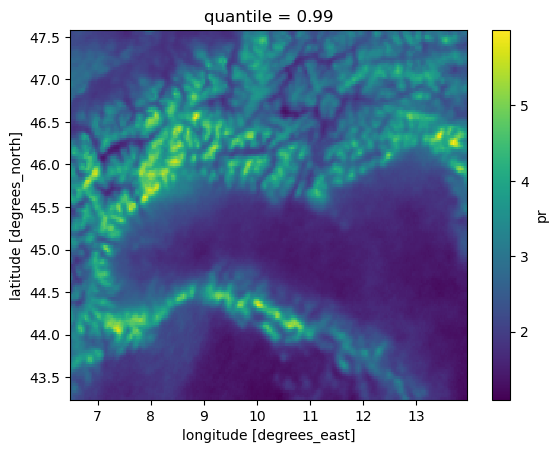

In [54]:
x.load().pr.quantile(q=0.99,dim='time').plot()

Exception ignored in: <function CachingFileManager.__del__ at 0x7f4010fda5c0>
Traceback (most recent call last):
  File "/home/lcesarini/miniconda3/envs/colorbar/lib/python3.11/site-packages/xarray/backends/file_manager.py", line 243, in __del__
    ref_count = self._ref_counter.decrement(self._key)
                ^^^^^^^^^^^^^^^^^
AttributeError: 'CachingFileManager' object has no attribute '_ref_counter'


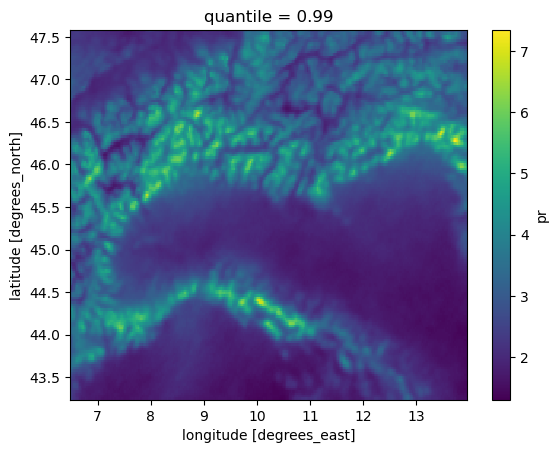

In [55]:
pathOUT="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Historical/FZJ-IBG3-WRF381CA/CPM/pr"

x=xr.open_mfdataset(f"{pathOUT}/*.nc").load()
x.pr.quantile(dim='time',q=0.99).plot()

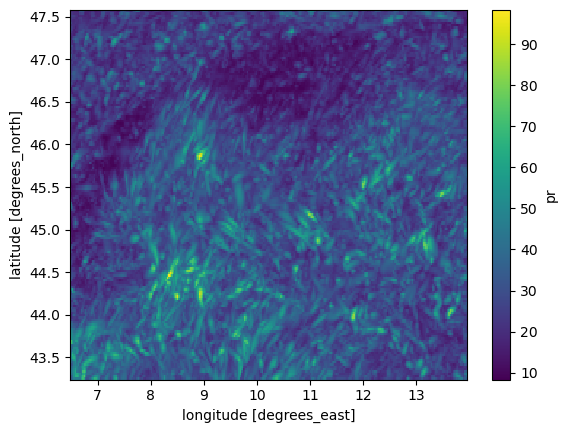

In [57]:
x.max(dim='time').pr.plot()

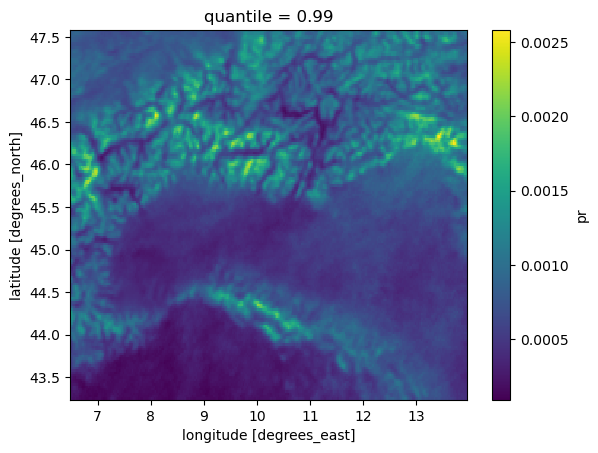

In [59]:
pathOUT="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Rcp85/FZJ-IDL-WRF381DA/CPM/pr"

x=xr.open_mfdataset(f"/mnt/data/lcesarini/tmp/xxxxxx.nc").load()
x.pr.quantile(dim='time',q=0.99).plot()

In [10]:
x


<xarray.Dataset>
Dimensions:    (time: 96408, bnds: 2, lon: 272, lat: 158)
Coordinates:
  * time       (time) datetime64[ns] 2089-01-01 ... 2099-12-31T23:00:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2089-01-01 ... 2100-01-01
    pr         (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1708 0.146 0.1229
Attributes: (12/29)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Mon Sep 25 06:56:30 2023: cdo remapycon,n...
    institution:                    Institute of Bio- and Geosciences (IBG-3,...
    Conventions:                    CF-1.4
    conventionsURL:                 http://www.cfconventions.org
    title:                          FZJ-IDL-WRF381DA model output prepared fo...
    ...                             ...
    frequency:                      1hr
    comment:                        Postprocessing performed by Joao Careto (...
    references:                     http://www.fz-juelich.de , http://idl.cam...
    creation_date:                  2021-05-18-T12:25:19Z
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [69]:
!ls /mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Rcp85

CMCC  ETH		HCLIMcom  IDL-WRF381CA	KNMI
CNRM  FZJ-IDL-WRF381DA	ICTP	  KIT		MOHC


In [66]:
import xarray as xr
x=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Historical/FZJ-IDL-WRF381DA/CPM/pr/*")
x


<xarray.Dataset>
Dimensions:    (time: 87640, bnds: 2, lon: 272, lat: 158)
Coordinates:
  * time       (time) datetime64[ns] 1996-01-01T00:30:00 ... 2005-12-31T23:30:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(8784, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(8784, 158, 272), meta=np.ndarray>
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Thu Oct 05 11:45:14 2023: cdo remapycon,/...
    institution:                    Institute of Bio- and Geosciences (IBG-3,...
    Conventions:                    CF-1.10
    conventionsURL:                 http://www.cfconventions.org
    contact:                        cordex@fz-juelich.de
    ...                             ...
    nesting_levels:                 2
    comment_nesting:                These are the results for the 2nd nest of...
    comment_1nest:                  CMIP5 SMHI-EC-EARTH, r12i1p1, RCP8.5 driv...
    comment_2nest:                  Actual convection-permitting FPSCONV simu...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

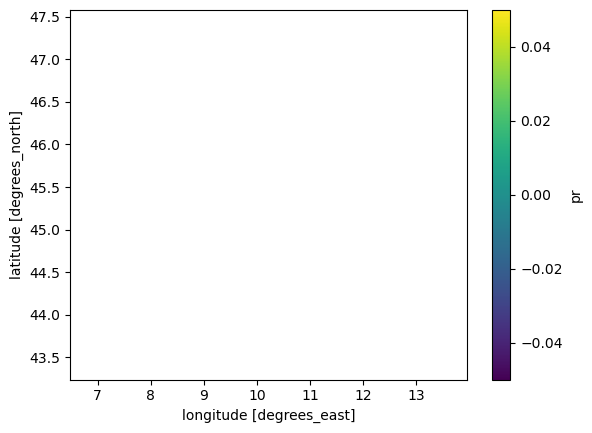

In [67]:
x.pr.max(dim='time').plot()

In [72]:
import xarray as xr
x=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Rcp85/FZJ-IDL-WRF381DA/CPM/pr/*").load()


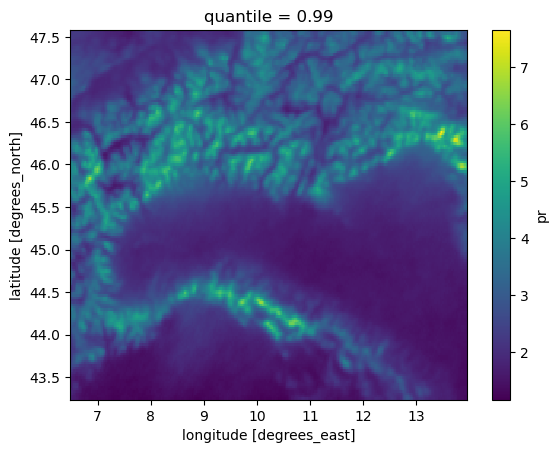

In [73]:
x.pr.quantile(q=0.99,dim='time').plot()

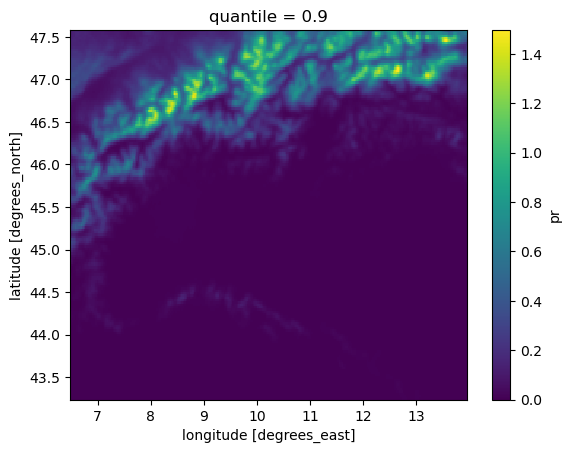

In [74]:
import xarray as xr
x=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Rcp85/IDL-WRF381CA/CPM/pr/pr_ALP-3_SMHI-EC-EARTH_rcp85_r12i1p1_FZJ-IDL-WRF381CA_fpsconv-x1n2-v1_1hr_209001010030-209012312330.nc").load()
x.pr.quantile(dim='time',q=0.9).plot()

In [75]:
import xarray as xr
x=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/IDL-WRF381BH/CPM/pr/*").load()


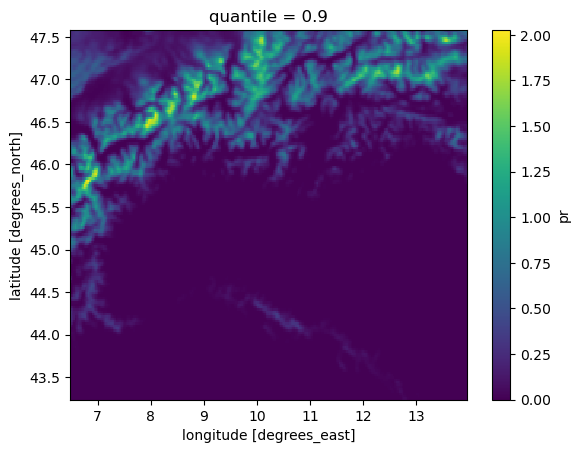

In [76]:
x.pr.quantile(dim='time',q=0.9).plot()

In [12]:
eqm_tr=xr.open_dataset("/mnt/data/lcesarini/BIAS_CORRECTED/EQM/KNMI/pr/KNMI_CORR_STATIONS_SON_Q1000_SEQUENTIAL_TRAIN.nc").load()
eqm_vl=xr.open_dataset("/mnt/data/lcesarini/BIAS_CORRECTED/EQM/KNMI/pr/KNMI_CORR_STATIONS_SON_Q1000_SEQUENTIAL_VALIDATION.nc").load()

eqm_tr,eqm_vl

(<xarray.Dataset>
 Dimensions:  (time: 10920, lat: 88, lon: 99)
 Coordinates:
   * time     (time) datetime64[ns] 2000-09-01T00:30:00 ... 2004-11-30T23:30:00
   * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
   * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
 Data variables:
     pr       (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan,
 <xarray.Dataset>
 Dimensions:  (time: 10920, lat: 88, lon: 99)
 Coordinates:
   * time     (time) datetime64[ns] 2005-09-01T00:30:00 ... 2009-11-30T23:30:00
   * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
   * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
 Data variables:
     pr       (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan)

In [ ]:
eqm_rw=xr.open_mfdataset("/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/pr/*").load()
eqm_rw

In [20]:
eqm_rw=eqm_rw.sel(time=eqm_rw['time.season'].isin('SON'))
raw_tr=eqm_rw.sel(time=slice(None,"2005-01-01"))
raw_vl=eqm_rw.sel(time=slice("2005-01-01","2010-01-01"))
raw_vl

<xarray.Dataset>
Dimensions:    (time: 10920, bnds: 2, lon: 272, lat: 158)
Coordinates:
  * time       (time) datetime64[ns] 2005-09-01T00:30:00 ... 2009-11-30T23:30:00
  * lon        (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
  * lat        (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2005-09-01 ... 2009-12-01
    pr         (time, lat, lon) float32 5.679e-17 5.737e-17 ... 2.094 2.107
Attributes: (12/31)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    history:                        Mon Feb 13 12:05:01 2023: cdo remapycon,n...
    source:                         HARMONIE Climate Modelling Community (HCL...
    institution:                    Royal Netherlands Meteorological Institute
    Conventions:                    CF-1.4
    frequency:                      1hr
    ...                             ...
    comment_1stNest:                direct downscaling from ERA-Interim 0.75x...
    comment_2ndNest:                actual convection permitting FPS simulati...
    references:                     https://hirlam.org/trac/wiki/HarmonieClimate
    knmi_global_comment:            converted from FA to NetCDF with gl/xtool...
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [29]:
sta_val=xr.open_mfdataset([f"{PATH_COMMON_DATA}/stations/pr/pr_st_{year}.nc" for year in np.arange(2000,2010)]).load()


In [30]:
sta_val.isel(lon=71,lat=8)

<xarray.Dataset>
Dimensions:  (time: 87672)
Coordinates:
    lat      float64 44.93
    lon      float64 12.36
  * time     (time) datetime64[ns] 2000-01-01 ... 2009-12-31T23:00:00
Data variables:
    pr       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [34]:
sta_val=sta_val.sel(time=sta_val['time.season'].isin('SON'))
sta_val

<xarray.Dataset>
Dimensions:  (lat: 88, lon: 99, time: 21840)
Coordinates:
  * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
  * time     (time) datetime64[ns] 2000-09-01 ... 2009-11-30T23:00:00
Data variables:
    pr       (lat, lon, time) float64 nan nan nan nan nan ... nan nan nan nan

In [35]:
sta_tr=sta_val.sel(time=slice(None,"2005-01-01"))

sta_vl=sta_val.sel(time=slice("2005-01-01","2010-01-01"))

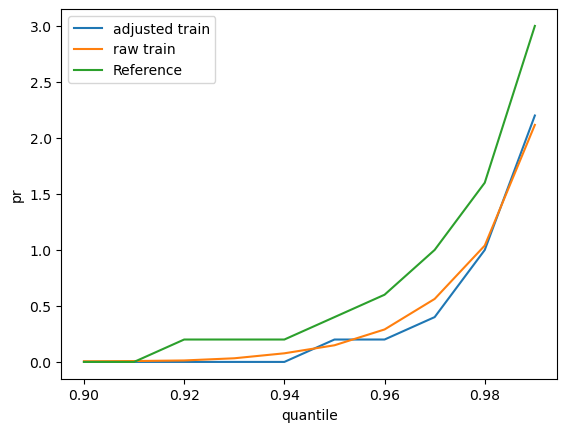

In [38]:
eqm_tr.sel(lon=12.35732937,lat=44.92745113,method='nearest').pr.quantile(q=np.arange(0.9,0.999,0.01)).plot(label="adjusted train")
raw_tr.sel(lon=12.35732937,lat=44.92745113,method='nearest').pr.quantile(q=np.arange(0.9,0.999,0.01)).plot(label="raw train")
sta_tr.sel(lon=12.35732937,lat=44.92745113,method='nearest').pr.quantile(q=np.arange(0.9,0.999,0.01)).plot(label="Reference")
plt.legend()

In [3]:
cmap_f,cmap_i,cmap_q=get_palettes()
lvl_f,lvl_i,lvl_q=get_levels()
list_mdl=["ETH","CNRM","KNMI","ICTP","HCLIMcom","MOHC","CMCC","KIT"] #


In [4]:
ens_bia = xr.concat([xr.open_dataset(f"output/JJA/{mdl}_f_biased_TRAIN_10000.nc") for mdl in list_mdl],"model").mean(dim='model')
ens_eqm = xr.concat([xr.open_dataset(f"output/JJA/{mdl}_f_EQM_TRAIN_10000.nc") for mdl in list_mdl],"model").mean(dim='model')
ens_qdm = xr.concat([xr.open_dataset(f"output/JJA/{mdl}_f_QDM_TRAIN_10000.nc") for mdl in list_mdl],"model").mean(dim='model')



In [8]:
mask=xr.open_dataset("data/mask_stations_nan_common.nc")
mask

<xarray.Dataset>
Dimensions:  (lat: 158, lon: 272)
Coordinates:
  * lat      (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
  * lon      (lon) float64 6.5 6.527 6.555 6.582 6.61 ... 13.87 13.9 13.92 13.95
Data variables:
    mask     (lat, lon) float64 ...

In [11]:
ens_eqm

<xarray.Dataset>
Dimensions:  (lat: 88, lon: 99)
Coordinates:
  * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
Data variables:
    pr       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [35]:
x=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/RCM/tas/tas_MED-11_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200501010030-200512312330.nc")

In [38]:
x

<xarray.Dataset>
Dimensions:  (height: 1, time: 8760, y: 261, x: 405)
Coordinates:
  * height   (height) float64 2.0
  * time     (time) datetime64[ns] 2005-01-01T01:00:00 ... 2006-01-01
Dimensions without coordinates: y, x
Data variables:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
    tas      (time, height, y, x) float32 ...
Attributes: (12/23)
    CDI:                            Climate Data Interface version 1.8.2 (htt...
    Conventions:                    CF-1.4
    history:                        Tue Jul 16 09:59:06 2019: cdo addc,273.15...
    institution:                    Centre National de Recherches Meteorologi...
    contact:                        samuel.somot@meteo.fr
    comment:                        CORDEX Mediterranean ALADIN6.0 deg ERA-IN...
    ...                             ...
    RCM_version_id:                 v1
    product:                        output
    references:                     http://www.cnrm-game.fr/spip.php?rubrique...
    filename:                       MAD12-1.90a_NONE_tas_1H_200501.nc
    creation_date:                  2017-04-25 17:53:58
    CDO:                            Climate Data Operators version 1.8.2 (htt...

In [39]:
degree_to_meters(0.13)

14448.07

In [23]:
xr.where(ens_eqm.pr == 0,np.nan,ens_eqm.pr)

<xarray.DataArray 'pr' (lat: 88, lon: 99)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon      (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1

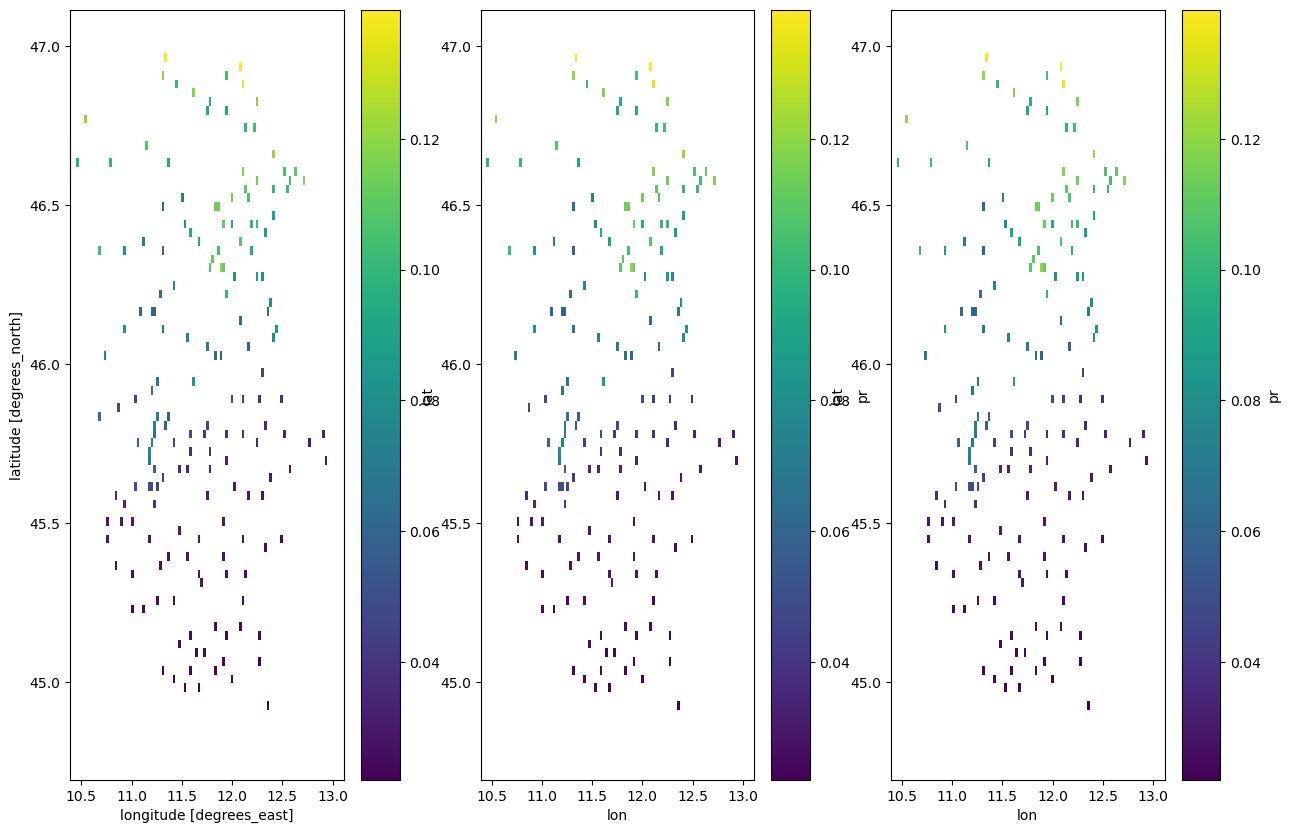

In [24]:
fig,ax=plt.subplots(1,3,figsize=(15,10))

(ens_bia.pr * mask.mask).isel(lon = (ens_bia.pr * mask.mask).lon.isin(ens_eqm.lon.values),
                              lat = (ens_bia.pr * mask.mask).lat.isin(ens_eqm.lat.values)).plot(ax=ax[0])
xr.where(ens_eqm.pr == 0,np.nan,ens_eqm.pr).plot(ax=ax[1])
xr.where(ens_qdm.pr == 0,np.nan,ens_qdm.pr).plot(ax=ax[2])


In [29]:
dx=((ens_bia.pr * mask.mask).isel(lon = (ens_bia.pr * mask.mask).lon.isin(ens_eqm.lon.values),
                              lat = (ens_bia.pr * mask.mask).lat.isin(ens_eqm.lat.values)).values -\
xr.where(ens_eqm.pr == 0,np.nan,ens_eqm.pr).values) /\
xr.where(ens_eqm.pr == 0,np.nan,ens_eqm.pr).values


In [32]:
np.nanmax(dx)

0.0

In [76]:

sph=xr.open_dataset("/home/lcesarini/2022_resilience/output/JJA/SPHERA_q_1000_SEQUENTIAL_VALIDATION.nc")
ens=xr.open_dataset("/home/lcesarini/2022_resilience/output/JJA/ENSEMBLE_q_biased_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
eqm=xr.open_dataset("/home/lcesarini/2022_resilience/output/JJA/ENSEMBLE_q_EQM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
qdm=xr.open_dataset("/home/lcesarini/2022_resilience/output/JJA/ENSEMBLE_q_QDM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")

In [77]:
lvl_q=[12.36,13.55,14.73,15.92,17.11,18.29,19.48,20.66,21.85]

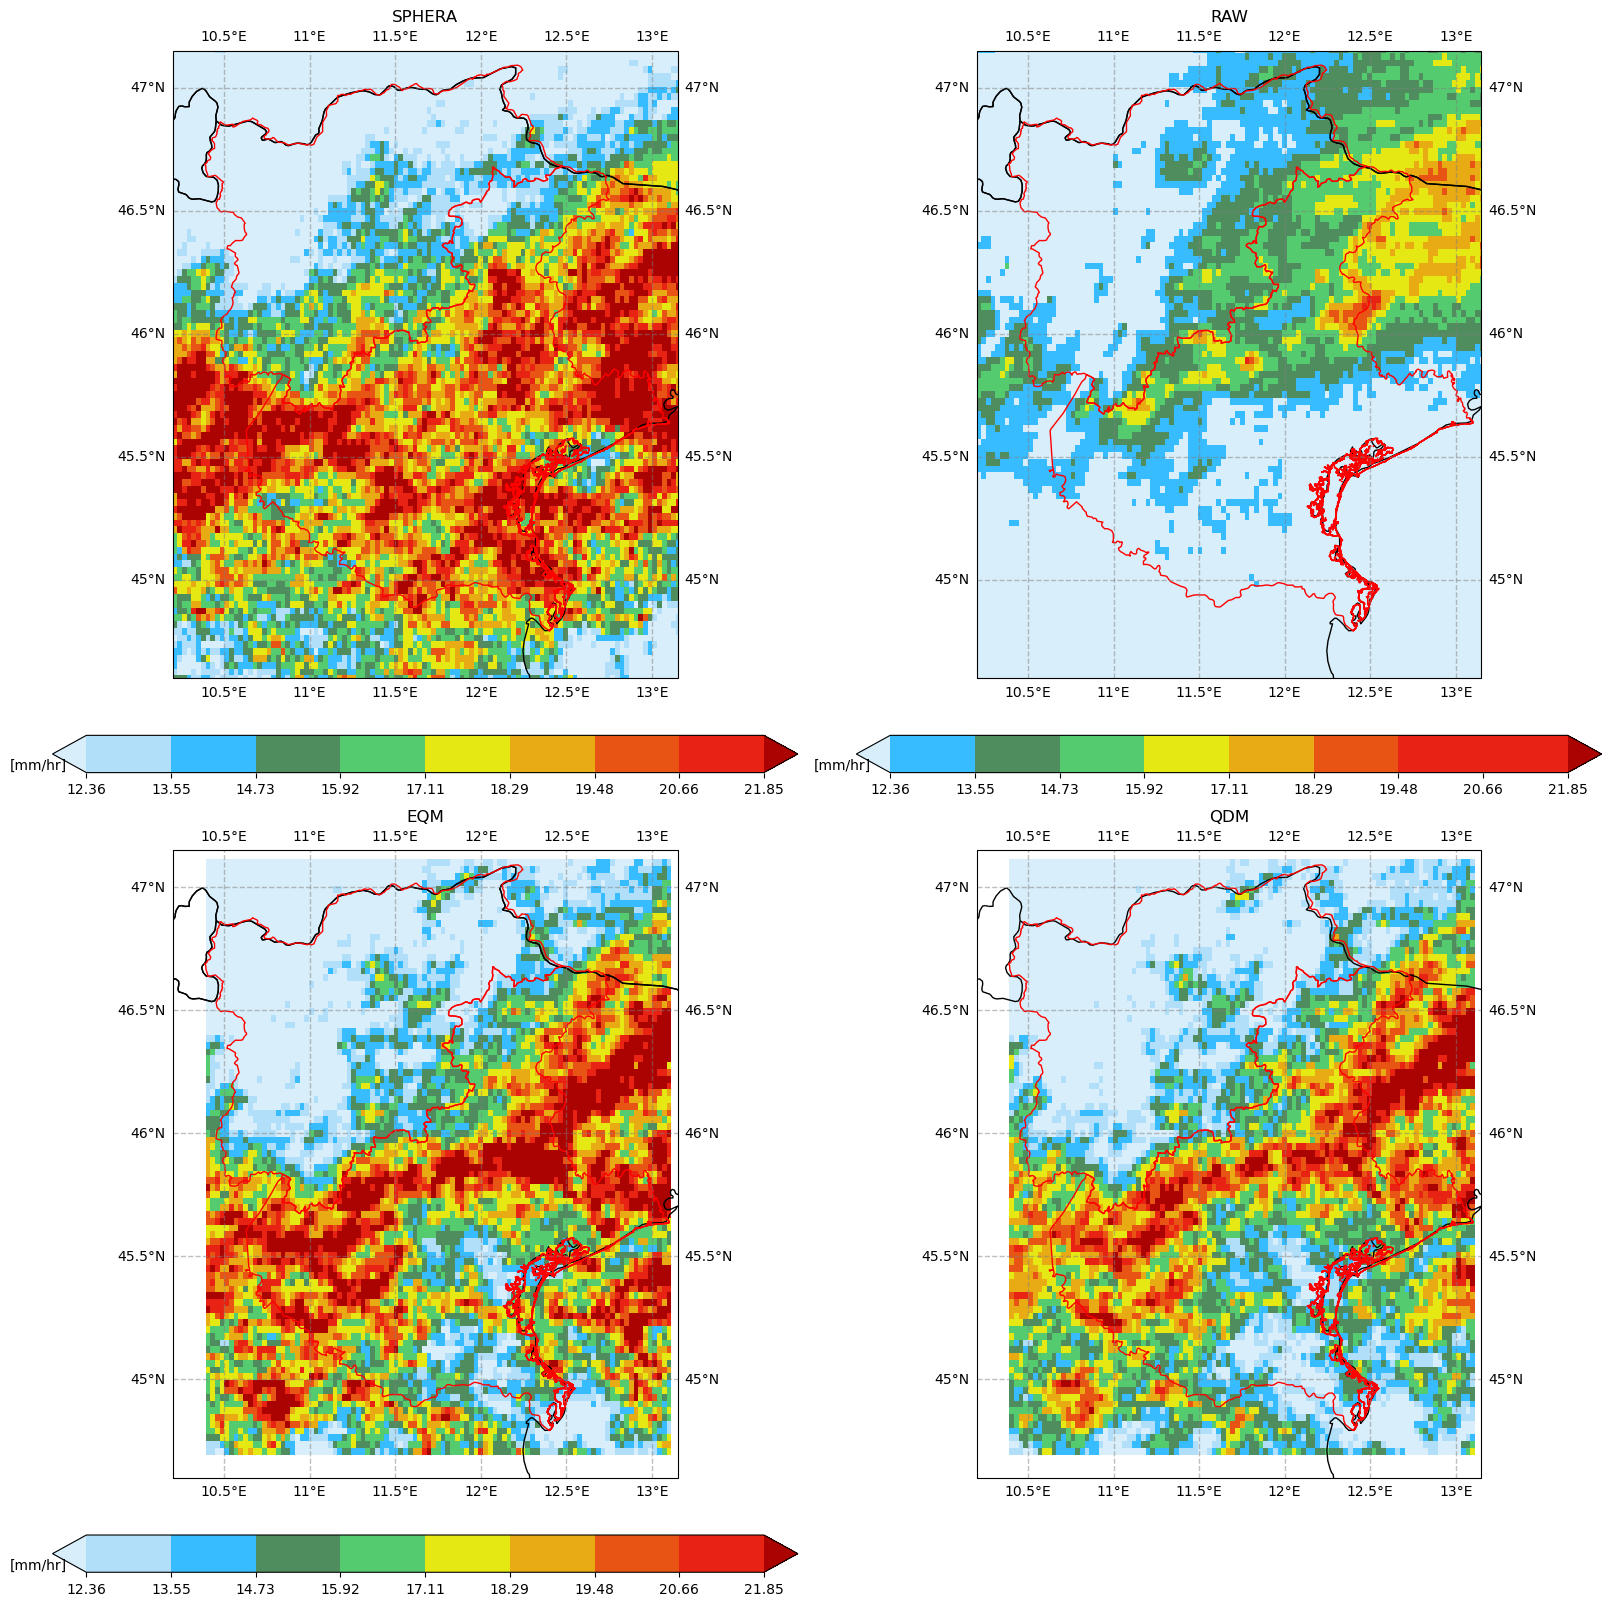

In [78]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=2,ncol=2,
    list_to_plot=[sph.pr,ens.pr,eqm.pr,qdm.pr],
    name_fig=f"EVERYTHING",
    list_titles= ["SPHERA","RAW","EQM","QDM"],
    levels=[lvl_q,lvl_q,lvl_q,lvl_q],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]","[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=[cmap_q,cmap_q,cmap_q,cmap_q],
    SAVE=False
)

In [79]:
sph=sph.rename({"longitude":"lon","latitude":"lat"})

In [80]:
sph["lon"]=ens.lon.values
sph["lat"]=ens.lat.values

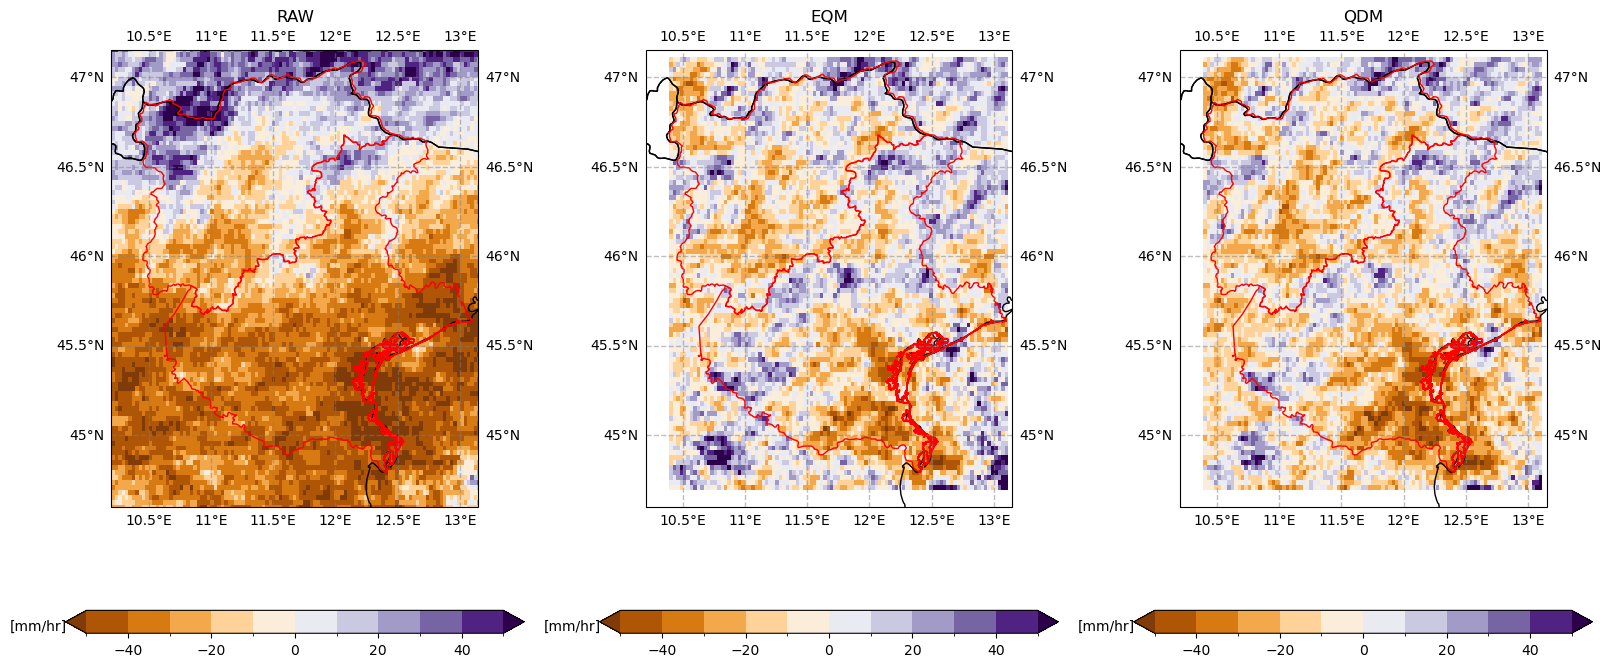

In [81]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=1,ncol=3,
    list_to_plot=[((ens.pr - sph.pr) / sph.pr) * 100,
                  ((eqm.pr - sph.pr) / sph.pr) * 100,
                  ((qdm.pr - sph.pr) / sph.pr) * 100],
    name_fig=f"EVERYTHING",
    list_titles= ["RAW","EQM","QDM"],
    levels=[np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-50,51,10)],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]","[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=["PuOr","PuOr","PuOr"],
    SAVE=False
)

In [82]:
((ens.pr - sph.pr) / sph.pr).values.ravel().shape


(42976,)

In [83]:
df=pd.DataFrame([((ens.pr - sph.pr) / sph.pr).values.ravel() * 100,
                  ((eqm.pr - sph.pr) / sph.pr).values.ravel() * 100,
                  ((qdm.pr - sph.pr) / sph.pr).values.ravel() * 100]).transpose()
df

0          1          2
0     -30.537550  -3.246598  -3.390374
1     -30.848664  -0.417378  -5.520794
2     -34.375135  -5.425315  -3.368774
3     -44.758257 -16.444539 -16.366020
4     -45.077787  -4.089055 -16.965434
...          ...        ...        ...
42971        NaN        NaN        NaN
42972        NaN        NaN        NaN
42973        NaN        NaN        NaN
42974        NaN        NaN        NaN
42975        NaN        NaN        NaN

[42976 rows x 3 columns]

(-100.0, 100.0)

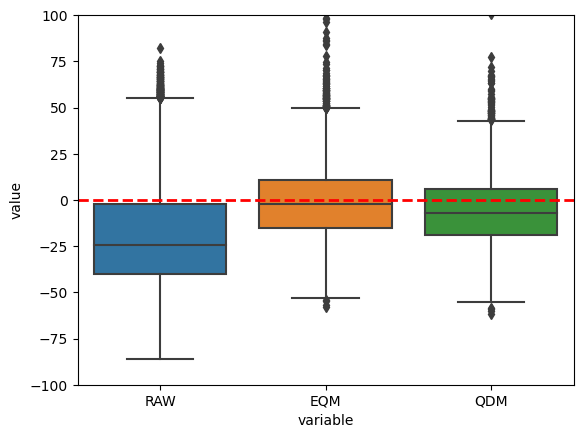

In [84]:
df.columns=["RAW","EQM","QDM"]
ax=plt.axes()
sns.boxplot(df.melt(),x='variable',y='value')
plt.axhline(y=0,color='red',linewidth=2,linestyle='dashed')
ax.set_ylim([-100,100])

In [12]:
lvl_q=[3.62,4.55,5.49,6.43,7.37,8.31,9.25,10.18,11.12]
sph=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/SPHERA_q_1000_SEQUENTIAL_VALIDATION.nc")
ens=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/ENSEMBLE_q_biased_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")


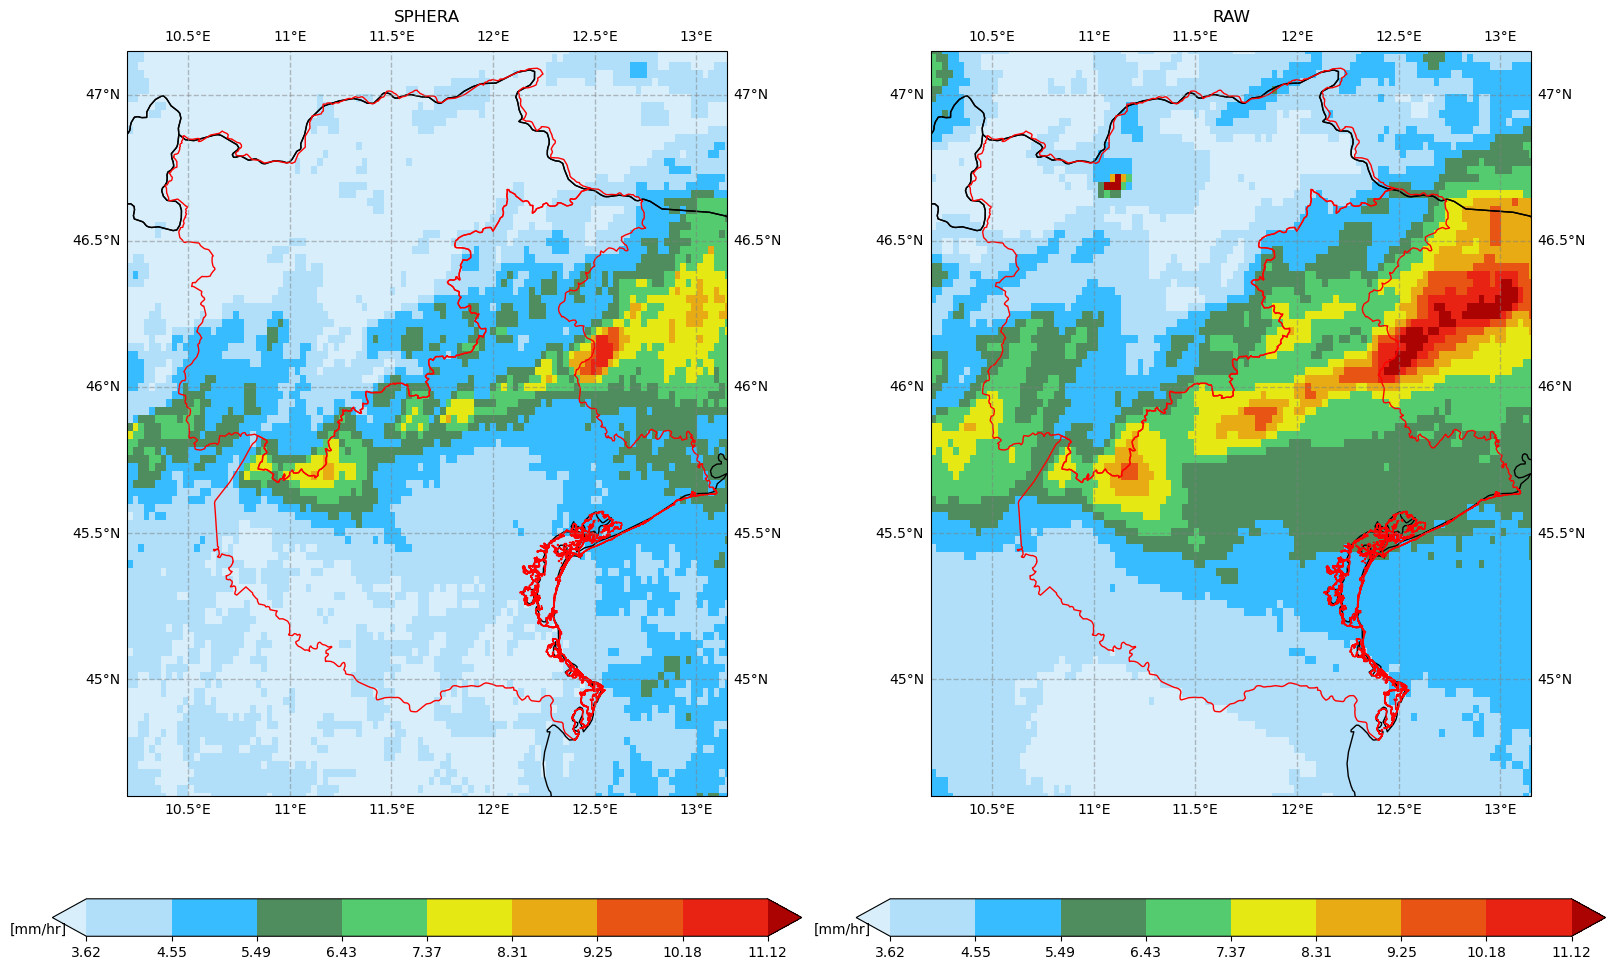

In [13]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=1,ncol=2,
    list_to_plot=[sph.pr,ens.pr],
    name_fig=f"EVERYTHING",
    list_titles= ["SPHERA","RAW","EQM","QDM"],
    levels=[lvl_q,lvl_q],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=[cmap_q,cmap_q],
    SAVE=False
)

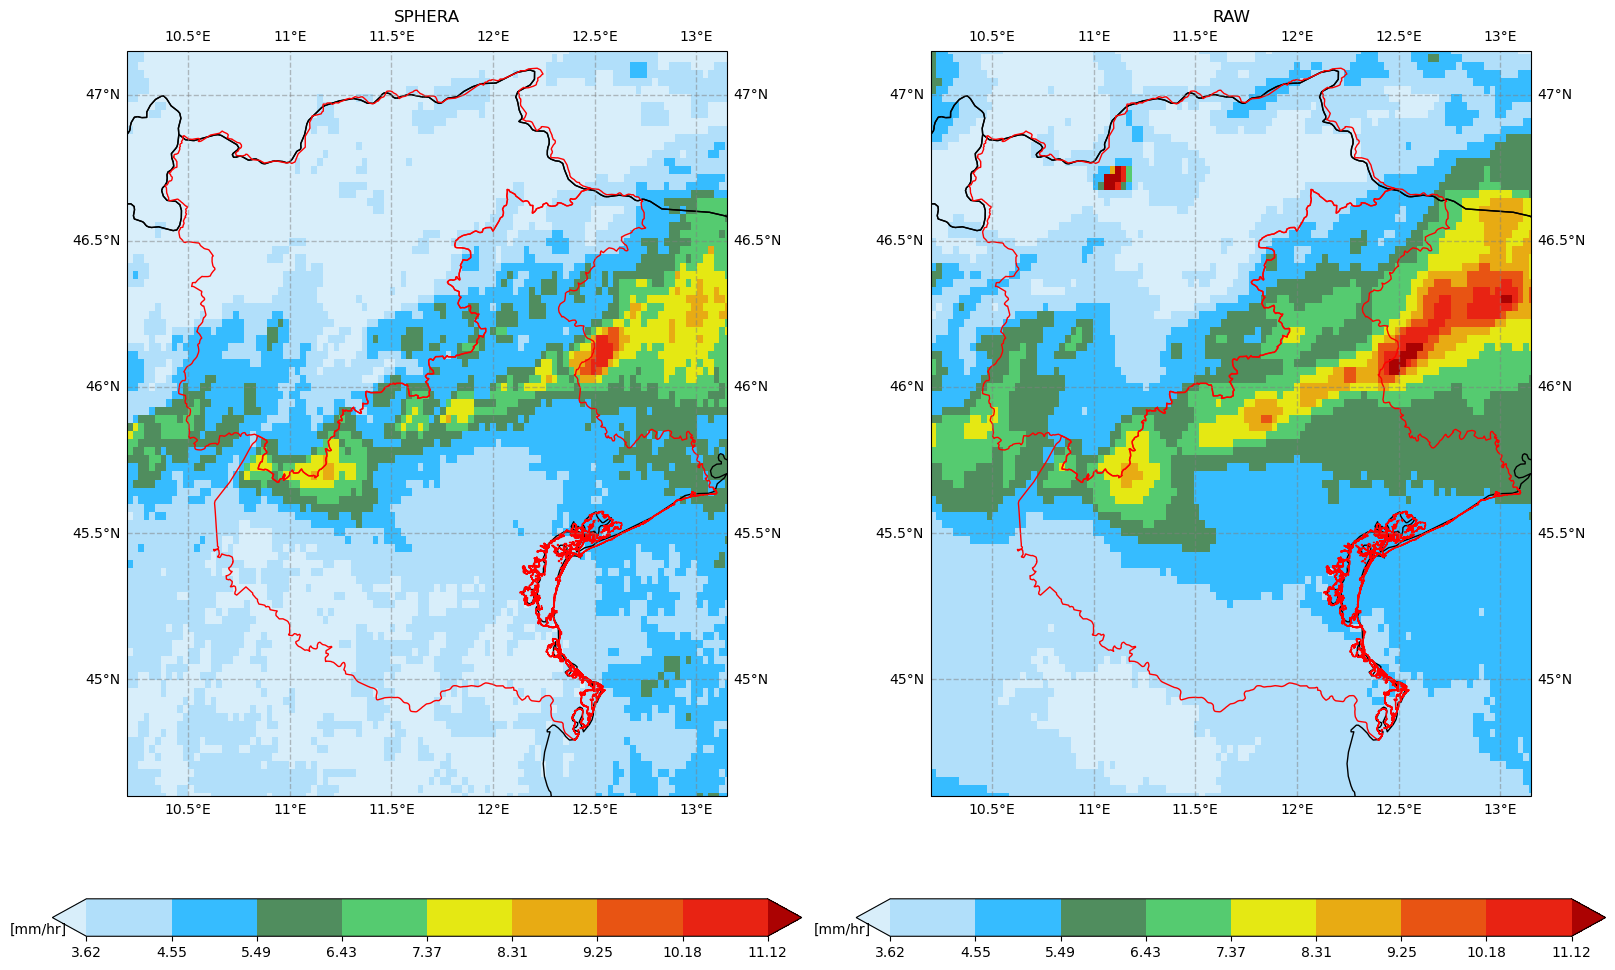

In [19]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=1,ncol=2,
    list_to_plot=[sph.pr,ens.pr],
    name_fig=f"EVERYTHING",
    list_titles= ["SPHERA","RAW","EQM","QDM"],
    levels=[lvl_q,lvl_q],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=[cmap_q,cmap_q],
    SAVE=False
)

# DJF 

In [18]:
fzj=xr.open_mfdataset('/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/Rcp85/FZJ-IDL-WRF381DA/CPM/pr/FZJ*')

In [21]:
fzj=fzj.load()

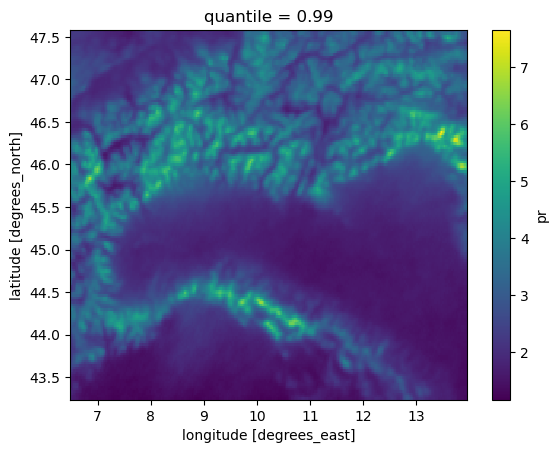

In [22]:
fzj.pr.quantile(dim='time',q=0.99).plot()

In [25]:
list_mdl=["MOHC","CNRM","KNMI","ICTP","HCLIMcom","KIT","CMCC","ETH"]

In [29]:
[print(mdl,glob(f"/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/{mdl}/CPM/*")) for mdl in list_mdl]

MOHC ['/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/pr', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/MOHC/CPM/uas']
CNRM ['/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/pr', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/uas', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/vas', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/mw', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/CNRM/CPM/wsgsmax']
KNMI ['/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/pr', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/uas', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/vas', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/mw', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/wsgsmax', '/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/KNMI/CPM/wind_dir']
ICTP ['/mnt/data/RESTRICTED/CARIPARO/DATA_FPS/ECMWF-ERAINT/ICTP/CPM/pr', '/mnt/data/RESTRI

[None, None, None, None, None, None, None, None]

In [ ]:
eqm=[xr.open_dataset(f"/home/lcesarini/2022_resilience/output/DJF/{i}_q_EQM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc") for i in list_mdl]
qdm=[xr.open_dataset(f"/home/lcesarini/2022_resilience/output/DJF/{i}_q_QDM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc") for i in list_mdl]

In [36]:
eqm=xr.concat(eqm,list_mdl).rename({'concat_dim':'correction'}).mean(dim='correction')
qdm=xr.concat(qdm,list_mdl).rename({'concat_dim':'correction'}).mean(dim='correction')
qdm


<xarray.Dataset>
Dimensions:   (lat: 88, lon: 99)
Coordinates:
  * lat       (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon       (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
    quantile  float64 0.999
Data variables:
    pr        (lat, lon) float64 3.083 2.949 2.879 2.911 ... 3.792 3.867 4.072

In [89]:
eqm=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/ENSEMBLE_q_EQM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
qdm=xr.open_dataset("/home/lcesarini/2022_resilience/output/DJF/ENSEMBLE_q_QDM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")

In [43]:
def get_triveneto(ds,sta_val):
    if 'lat' in list(ds.coords):

        return (ds * mask.mask).isel(lon=ds.lon.isin(sta_val.lon),
                                     lat=ds.lat.isin(sta_val.lat))

    elif 'longitude' in list(ds.coords):
        return (ds * mask.mask).isel(longitude=ds.longitude.isin(sta_val.lon),
                                     latitude=ds.latitude.isin(sta_val.lat))

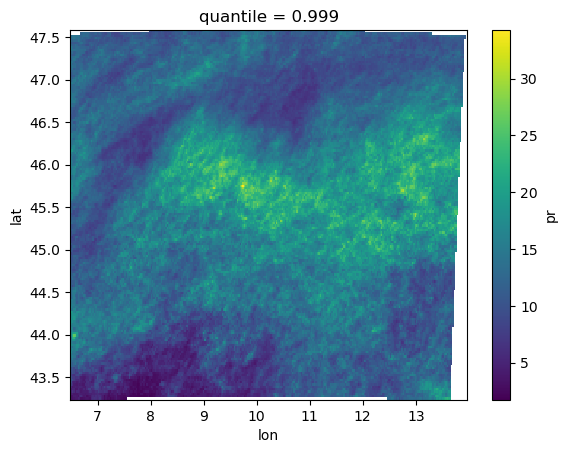

In [110]:
sph.pr.plot()

In [113]:
sph=crop_to_extent(sph )

In [58]:
sph=sph.rename({"longitude":"lon","latitude":"lat"})
sph["lon"]=ens.lon.values
sph["lat"]=ens.lat.values

In [114]:
bias_raw=((ens.pr - sph.pr) / sph.pr) * 100

In [115]:
bias_eqm=(eqm.pr - sph.pr) / sph.pr * 100

In [116]:
bias_qdm=(qdm.pr - sph.pr) / sph.pr * 100

In [122]:
bias_qdm

<xarray.DataArray 'pr' (lat: 88, lon: 99)>
array([[-77.35655953, -77.55494832, -77.79035396, ..., -55.00799824,
        -57.25509803, -50.33493559],
       [-73.30718515, -74.13917716, -74.65252218, ..., -48.74522125,
        -55.59846296, -50.45494505],
       [-75.95010675, -78.72705301, -76.33519402, ..., -58.51112805,
        -54.17521445, -50.54679004],
       ...,
       [-61.66678434, -63.96658011, -68.1145085 , ..., -66.90527588,
        -68.77781038, -65.45062915],
       [-65.00604058, -63.25845758, -62.89917697, ..., -66.09111885,
        -66.26221679, -62.86541787],
       [-65.33410196, -66.59450856, -67.22522363, ..., -64.8747666 ,
        -65.19729182, -62.75947669]])
Coordinates:
  * lat       (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
  * lon       (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
    quantile  float64 0.999

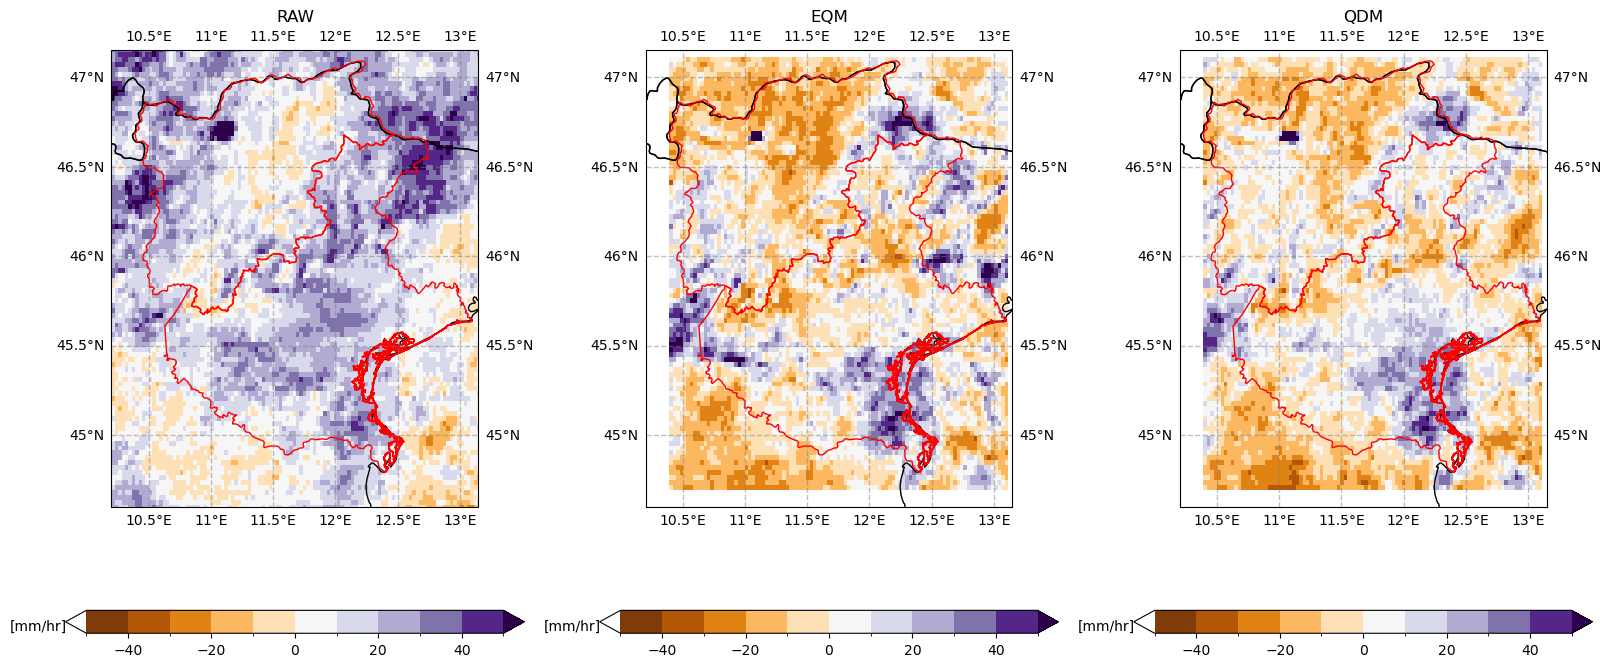

In [66]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=1,ncol=3,
    list_to_plot=[bias_raw,bias_eqm,bias_qdm],
    name_fig=f"EVERYTHING",
    list_titles= ["RAW","EQM","QDM"],
    levels=[np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-50,51,10)],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]","[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=["PuOr","PuOr","PuOr"],
    SAVE=False
)

In [69]:
df=pd.DataFrame([bias_raw.values.ravel(),
                 bias_eqm.values.ravel(),
                 bias_qdm.values.ravel()]).transpose()
df

0          1          2
0      5.824803  -7.538982  -7.023050
1     -1.720474 -15.629607 -16.400081
2      2.600661 -17.463601 -18.821011
3     -3.351088 -16.733178 -18.214059
4     -6.864242 -20.852849 -21.691766
...         ...        ...        ...
42971       NaN        NaN        NaN
42972       NaN        NaN        NaN
42973       NaN        NaN        NaN
42974       NaN        NaN        NaN
42975       NaN        NaN        NaN

[42976 rows x 3 columns]

(-100.0, 100.0)

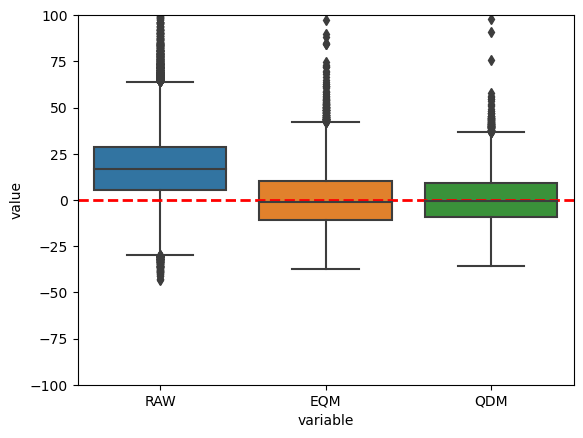

In [73]:
df.columns=["RAW","EQM","QDM"]
ax=plt.axes()
sns.boxplot(df.melt(),x='variable',y='value')
plt.axhline(y=0,color='red',linewidth=2,linestyle='dashed')
ax.set_ylim([-100,100])

In [124]:
ens_f_bia=xr.open_dataset("output/DJF/ENSEMBLE_f_biased_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
ens_f_eqm=xr.open_dataset("output/DJF/ENSEMBLE_f_EQM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
ens_f_qdm=xr.open_dataset("output/DJF/ENSEMBLE_f_QDM_SPHERA_1000_SEQUENTIAL_VALIDATION.nc")
sphera_f=xr.open_dataset("output/DJF/SPHERA_f_1000_SEQUENTIAL_VALIDATION.nc")

In [127]:
((ens_f_bia.pr - sphera_f.pr) / sphera_f.pr).plot()

In [3]:
list_mdl=["MOHC","ETH","CNRM","KNMI","ICTP","HCLIMcom","KIT","CMCC"]


In [5]:
list_output_mdl=glob(f"/home/lcesarini/2022_resilience/output/JJA/*q_**1000**SEQUENTIAL**VALIDATION*")
list_output_mdl

['/home/lcesarini/2022_resilience/output/JJA/stations_q_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/MOHC_q_biased__1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/MOHC_q_EQM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/MOHC_q_QDM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/CNRM_q_biased__1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/CNRM_q_EQM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/CNRM_q_QDM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/KNMI_q_biased__1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/KNMI_q_EQM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/KNMI_q_QDM_1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarini/2022_resilience/output/JJA/ICTP_q_biased__1000_SEQUENTIAL_VALIDATION.nc',
 '/home/lcesarin

In [29]:
ds=[xr.open_dataset(f'/home/lcesarini/2022_resilience/output/DJF/{mdl}_q_biased_SPHERA_1000_SEQUENTIAL_VALIDATION.nc') for mdl in list_mdl]
ds

[<xarray.Dataset>
 Dimensions:   (lon: 272, lat: 158)
 Coordinates:
   * lon       (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
   * lat       (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
     quantile  float64 ...
 Data variables:
     pr        (lat, lon) float64 ...,
 <xarray.Dataset>
 Dimensions:   (lon: 272, lat: 158)
 Coordinates:
   * lon       (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
   * lat       (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
     quantile  float64 ...
 Data variables:
     pr        (lat, lon) float64 ...,
 <xarray.Dataset>
 Dimensions:   (lon: 272, lat: 158)
 Coordinates:
   * lon       (lon) float64 6.5 6.527 6.555 6.582 ... 13.87 13.9 13.92 13.95
   * lat       (lat) float64 43.25 43.28 43.3 43.33 ... 47.48 47.51 47.54 47.57
     quantile  float64 ...
 Data variables:
     pr        (lat, lon) float64 ...,
 <xarray.Dataset>
 Dimensions:   (lon: 272, lat: 158)
 Coordinates:
   * 

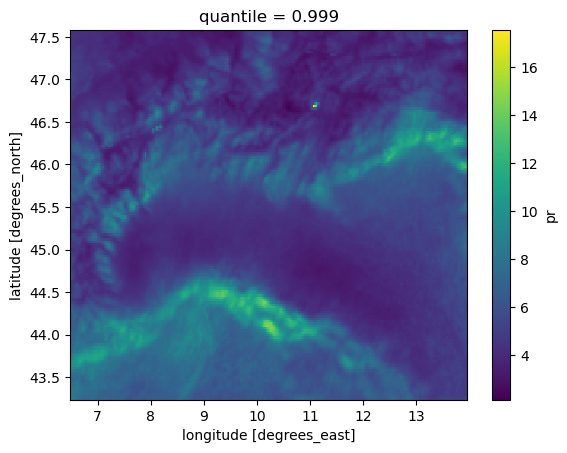

In [30]:
ds=xr.concat(ds,"model")
ds.mean(dim='model').pr.plot()

In [7]:
SEAS="DJF"
REF="STATIONS"
NQUANT=1000
SPLIT="SEQUENTIAL"
ADJUST="VALIDATION"

In [10]:
bia=xr.open_dataset(f'/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_q_biased_{REF}_1000_SEQUENTIAL_VALIDATION.nc').pr
eqm=xr.open_dataset(f'/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_q_EQM_{REF}_1000_SEQUENTIAL_VALIDATION.nc').pr
qdm=xr.open_dataset(f'/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_q_QDM_{REF}_1000_SEQUENTIAL_VALIDATION.nc').pr
sph=xr.open_dataset(f'/home/lcesarini/2022_resilience/output/{SEAS}/{REF}_q.nc').pr

In [16]:
if REF == "STATIONS":
    sph=sph.rename({"longitude":"lon","latitude":"lat"})
    sph["lon"]=bia.lon.values
    sph["lat"]=bia.lat.values

In [11]:
PATH_COMMON_DATA="/mnt/data/RESTRICTED/CARIPARO/DATA_FPS"
    
sta_val=xr.open_mfdataset([f"{PATH_COMMON_DATA}/stations/pr/pr_st_{year}.nc" for year in np.arange(2000,2010)]).load()


In [22]:
SEAS="DJF"
REF="STATIONS"
NQUANT=1000
SPLIT="SEQUENTIAL"
ADJUST="VALIDATION"
list_mdl=["MOHC","CNRM","KNMI","ICTP","HCLIMcom","KIT","CMCC","ETH"]
for metrica in ["f","i","v","q"]:
    list_bia=[xr.open_dataset(f"/home/lcesarini/2022_resilience/output/{SEAS}/{mdl}_{metrica}_biased_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc") for mdl in list_mdl]
    list_eqm=[xr.open_dataset(f"/home/lcesarini/2022_resilience/output/{SEAS}/{mdl}_{metrica}_EQM_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc") for mdl in list_mdl]
    list_qdm=[xr.open_dataset(f"/home/lcesarini/2022_resilience/output/{SEAS}/{mdl}_{metrica}_QDM_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc") for mdl in list_mdl]

    ens_bia=xr.concat(list_bia,dim='model').mean(dim='model')
    ens_eqm=xr.concat(list_eqm,dim='model').mean(dim='model')
    ens_qdm=xr.concat(list_qdm,dim='model').mean(dim='model')
    
    ens_bia.to_netcdf(f"/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_{metrica}_biased_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc",mode='w')
    ens_eqm.to_netcdf(f"/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_{metrica}_EQM_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc",mode='w')
    ens_qdm.to_netcdf(f"/home/lcesarini/2022_resilience/output/{SEAS}/ENSEMBLE_{metrica}_QDM_{REF}_{NQUANT}_{SPLIT}_{ADJUST}.nc",mode='w')


In [23]:
sph_tri=get_triveneto(sph,sta_val)
bia_tri=get_triveneto(bia,sta_val)
eqm_tri=get_triveneto(eqm,sta_val)
qdm_tri=get_triveneto(qdm,sta_val)

In [24]:
nc_to_csv(sph_tri.isel(quantile=0),f"{REF}_q_{SEAS}_1000_SEQUENTIAL_VALIDATION","q")
nc_to_csv(bia_tri,f"ENSEMBLE_q_{SEAS}_biased_{REF}_1000_SEQUENTIAL_VALIDATION","q")
nc_to_csv(eqm_tri,f"ENSEMBLE_q_{SEAS}_EQM_{REF}_1000_SEQUENTIAL_VALIDATION","q")
nc_to_csv(qdm_tri,f"ENSEMBLE_q_{SEAS}_QDM_{REF}_1000_SEQUENTIAL_VALIDATION","q")

In [46]:
plot_panel_rotated(
    figsize=(16,16),
    nrow=1,ncol=3,
    list_to_plot=[bias_raw,bias_eqm,bias_qdm],
    name_fig=f"EVERYTHING",
    list_titles= ["RAW","EQM","QDM"],
    levels=[np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-50,51,10)],
    suptitle=f"",
    # name_metric=["[mm/h]","[mm/h]","[mm/h]"],
    name_metric=["[mm/hr]","[mm/hr]","[mm/hr]","[mm/hr]"],
    SET_EXTENT=True,
    cmap=["PuOr","PuOr","PuOr"],
    SAVE=False
)

<xarray.DataArray (lat: 88, lon: 99)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon       (lon) float64 10.4 10.43 10.46 10.49 ... 13.02 13.04 13.07 13.1
  * lat       (lat) float64 44.71 44.73 44.76 44.79 ... 47.02 47.04 47.07 47.1
    quantile  float64 ...

In [85]:
fzj=xr.open_dataset("/mnt/data/lcesarini/tmp//pr_ALP-3_SMHI-EC-EARTH_rcp85_r12i1p1_FZJ-IDL-WRF381DA_fpsconv-x1n2-v1_1hr_209301010030-209312312330.nc")

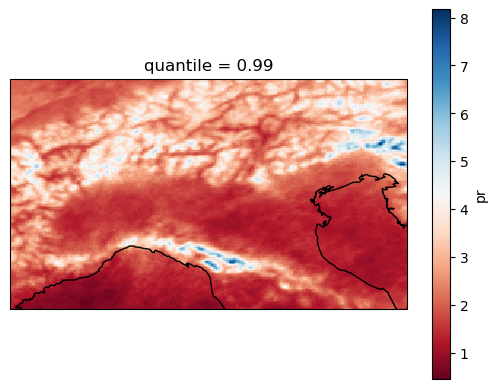

In [88]:
ax=plt.axes(projection=ccrs.PlateCarree())
fzj.pr.quantile(q=0.99,dim='time').plot(cmap='RdBu',ax=ax)
ax.coastlines()

In [14]:
cnrm1=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/RCM/pr/pr_MED-11_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200001010030-200012312330.nc")
cnrm2=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/RCM/tas/tas_MED-11_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200001010030-200012312330.nc")
cnrm3=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/RCM/uas/uas_MED-11_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200001010030-200012312330.nc")


In [ ]:
cnrm3=xr.open_dataset("/mnt/data/gfosser/DATA_FPS/ECMWF-ERAINT/CNRM/RCM/tasmax/tasmax_MED-11_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-ALADIN62_v1_day_20020101-20021231.nc")
cnrm3


In [34]:
cnrm4=xr.open_dataset("/mnt/data/lcesarini/tmp/tas_MED-11_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200101010030-200112312330.nc")
cnrm4

<xarray.Dataset>
Dimensions:  (time: 8760, height: 1, y: 261, x: 405)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01T01:00:00 ... 2002-01-01
  * height   (height) float64 2.0
Dimensions without coordinates: y, x
Data variables:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
    tas      (time, height, y, x) float32 ...
Attributes: (12/23)
    CDI:                            Climate Data Interface version 1.9.8 (htt...
    Conventions:                    CF-1.4
    history:                        Tue Jul 25 17:12:30 2023: cdo addc,-273.1...
    institution:                    Centre National de Recherches Meteorologi...
    contact:                        samuel.somot@meteo.fr
    comment:                        CORDEX Mediterranean ALADIN6.0 deg ERA-IN...
    ...                             ...
    RCM_version_id:                 v1
    product:                        output
    references:                     http://www.cnrm-game.fr/spip.php?rubrique...
    filename:                       MAD12-1.90a_NONE_tas_1H_200101.nc
    creation_date:                  2017-04-24 02:06:12
    CDO:                            Climate Data Operators version 1.9.8 (htt...

In [35]:
np.all(cnrm4.lon.values == cnrm1.lon.values)

True

In [29]:
np.all((cnrm2.lon.values-273.15) == cnrm1.lon.values)


True

In [33]:
cnrm2.data_vars

Data variables:
    lon      (y, x) float64 263.8 263.9 264.0 264.1 ... 325.6 325.8 325.9 326.1
    lat      (y, x) float64 298.5 298.5 298.5 298.6 ... 325.6 325.6 325.6 325.5
    tas      (time, height, y, x) float32 ...

In [30]:
np.all((cnrm2.lat.values-273.15) == cnrm1.lat.values)

True

In [32]:
cnrm2.attrs['history']

'Tue Jul 16 09:42:20 2019: cdo addc,273.15 tas_MED-12_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_celsius_200001010030-200012312330.nc tas_MED-12_ECMWF-ERAINT_evaluation_CNRM-ALADIN62_v1_1hr_200001010030-200012312330.nc'

In [28]:
cnrm1.lon.values

array([[ -9.37460041,  -9.26049995,  -9.14640045, ...,  39.14640045,
         39.26050186,  39.37459946],
       [ -9.40869999,  -9.29450035,  -9.18019962, ...,  39.18019867,
         39.29449844,  39.40869904],
       [ -9.4428997 ,  -9.32849979,  -9.21409988, ...,  39.21409988,
         39.32849884,  39.44290161],
       ...,
       [-22.77280045, -22.60980034, -22.44659996, ...,  52.44660187,
         52.60979843,  52.77280045],
       [-22.85149956, -22.68829918, -22.52479935, ...,  52.52479935,
         52.68830109,  52.85150146],
       [-22.93050003, -22.76709938, -22.60330009, ...,  52.60329819,
         52.76710129,  52.93050003]])

In [3]:
EV= "TOT_PRECIP"


stringa=f"{PATH_COSMO}/{EV}/*grb*"

cosmo=xr.open_mfdataset("/mnt/data/lcesarini/COSMO/REA_2/TOT_PRECIP/TOT_PRECIP.2D.201810.grb")

In [4]:
cosmo

<xarray.Dataset>
Dimensions:     (time: 744, y: 780, x: 724)
Coordinates:
  * time        (time) datetime64[ns] 2018-10-01T01:00:00 ... 2018-11-01
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 dask.array<chunksize=(780, 724), meta=np.ndarray>
    longitude   (y, x) float64 dask.array<chunksize=(780, 724), meta=np.ndarray>
    valid_time  (time) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    tp          (time, y, x) float32 dask.array<chunksize=(744, 780, 724), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2023-07-18T10:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [81]:
glob("output/bootstrap/EQM/JJA/*nc")[:10]




['output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_0.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_1.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_2.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_3.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_4.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_5.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_6.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_7.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_8.nc',
 'output/bootstrap/EQM/JJA/bias_heavy_prec_EQM_JJA_9.nc']

In [99]:
ll_bias_eqm=[xr.load_dataset(file) for file in glob("output/bootstrap/EQM/JJA/*nc")[:45]]
ll_bias_ori=[xr.load_dataset(file) for file in glob("output/bootstrap/ORI/JJA/*nc")[:45]]

In [100]:
ds1=xr.concat(ll_bias_eqm,np.arange(len(ll_bias_eqm))).rename({"concat_dim":"iteration"})
ds2=xr.concat(ll_bias_ori,np.arange(len(ll_bias_ori))).rename({"concat_dim":"iteration"})


In [101]:
x1,x2=np.where(~np.isnan(ds1.pr.values[0,:,:]))


In [102]:
list_ori_ss=[]
list_eqm_ss=[]
for i,j in zip(x1,x2):
    if ~((np.quantile(ds1.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds1.pr.values[:,i,j],q=0.975) < 0)):
        lon1,lat1=ds1.pr.isel(lon=j,lat=i).lon.item(),ds1.pr.isel(lon=j,lat=i).lat.item()
        list_eqm_ss.append([lon1,lat1])
    if ~((np.quantile(ds2.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds2.pr.values[:,i,j],q=0.975) < 0)):
        lon2,lat2=ds2.pr.isel(lon=j,lat=i).lon.item(),ds2.pr.isel(lon=j,lat=i).lat.item()
        list_ori_ss.append([lon2,lat2])

print(len(list_eqm_ss),len(list_ori_ss))

33 75


In [103]:
import folium

def create_interactive_map():
    # Create a map object centered on a specific location
    map_object = folium.Map(location=[45.8,11.8 ], zoom_start=6)

    # Add markers to the map
    for i,j in zip(x1,x2):
        if ~((np.quantile(ds1.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds1.pr.values[:,i,j],q=0.975) < 0)):
            lon,lat=ds1.pr.isel(lon=j,lat=i).lon.item(),ds1.pr.isel(lon=j,lat=i).lat.item()
            # sns.kdeplot(ds.pr.values[:,i,j],label=f"{lonlat}") 
            marker1 = folium.Marker(location=[lat, lon], 
                                    popup=f"EQM",
                                    icon=folium.Icon(color="green"),)
            map_object.add_child(marker1)
        if ~((np.quantile(ds2.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds2.pr.values[:,i,j],q=0.975) < 0)):
            lon,lat=ds2.pr.isel(lon=j,lat=i).lon.item(),ds2.pr.isel(lon=j,lat=i).lat.item()
            # sns.kdeplot(ds.pr.values[:,i,j],label=f"{lonlat}") 
            marker2 = folium.Marker(location=[lat, lon], 
                                    popup=f"RAW",
                                    icon=folium.Icon(color="blue"),)
            map_object.add_child(marker2)
    # Add markers to the map

    # Create a popup marker with HTML content
    html_popup = """
        <h3>New York City</h3>
        <p>This is a sample popup marker with HTML content.</p>
    """
    popup_marker = folium.Marker(location=[40.7128, -74.0060], popup=folium.Popup(html_popup, max_width=300))

    # Add the popup marker to the map
    map_object.add_child(popup_marker)

    # Draw a line between two points on the map
    # line = folium.PolyLine(locations=[(37.7749, -122.4194), (37.3382, -121.8863)], color='blue')

    # Add the line to the map
    # map_object.add_child(line)

    # Add a layer control to the map (optional)
    # folium.LayerControl().add_to(map_object)

    return map_object

In [104]:
interactive_map = create_interactive_map()
interactive_map

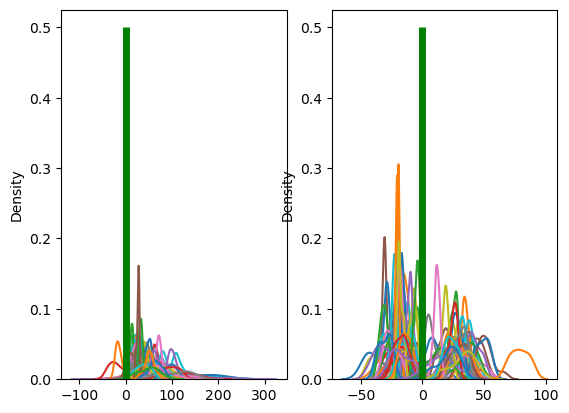

In [90]:
fig,ax=plt.subplots(1,2)
for i,j in zip(x1,x2):
    if ((np.quantile(ds1.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds1.pr.values[:,i,j],q=0.975) < 0)):
        lonlat=ds1.pr.isel(lon=j,lat=i).lon.item(),ds1.pr.isel(lon=j,lat=i).lat.item()
        sns.kdeplot(ds1.pr.values[:,i,j],ax=ax[0]
                    # label=f"{lonlat}"
                    ) 
    if ((np.quantile(ds2.pr.values[:,i,j],q=0.025) > 0) | (np.quantile(ds2.pr.values[:,i,j],q=0.975) < 0)):
        lonlat=ds2.pr.isel(lon=j,lat=i).lon.item(),ds2.pr.isel(lon=j,lat=i).lat.item()
        sns.kdeplot(ds2.pr.values[:,i,j],ax=ax[1]
                    # label=f"{lonlat}"
                    ) 
ax[0].vlines(x=0,ymin=0,ymax=0.5,color="green",linewidth=5)
ax[1].vlines(x=0,ymin=0,ymax=0.5,color="green",linewidth=5)


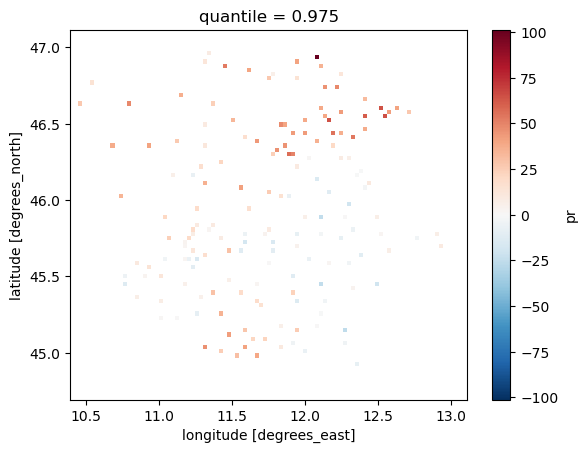

In [105]:
ds_band=ds2.quantile(dim='iteration',q=[0.025,0.975])
ds_band.pr.isel(quantile=1).plot.pcolormesh()